# Task 1 (10 Points)

I would like to use logistic regression to aid in predicting whether finding a proof in first order logic is able to be found in a reasonable amount of time. This is a relevant issue as the problem of finding a proof in first order logic with arbitrary premises and conclusions is undecidable. Particularly in the case of logic based AI agents with a first order reasoning core, we would like a way to determine if it is worth spending resources finding a proof (other than trying to find a proof until a threshold is reached). By creating a predictor that attempts to determine if a proof is able to be found in a reasonable amount of time, Our agent is able to prioritize tasks that are likely to be provable. Logistic regression is a good choice here because it is a binary classification task of whether a proof can be found in a reasonable amount of time, Yes or No. 

# Task 2 (20 Points)
For my task I have selected the First-order theorem proving Data Set publicly available at [https://archive.ics.uci.edu/ml/datasets/First-order+theorem+proving](https://archive.ics.uci.edu/ml/datasets/First-order+theorem+proving). This dataset provides various statistical heuristics over first order formulae such as (Fraction of clauses that are Horn clauses, Average clause length, Maximum clause depth, etc.) as well as whether a proof was able to be found in under 100 seconds, which will be our target. See paper at [https://www.cl.cam.ac.uk/~lp15/papers/Reports/Bridge-ml.pdf](https://www.cl.cam.ac.uk/~lp15/papers/Reports/Bridge-ml.pdf). The data has already been split into a training and testing set for us. 


In [18]:
import pandas as pd
names=[f"x_{i}" for i in range(56)] + ["y"] #names for our cols
train_data = pd.read_csv('ml-prove/train.csv', header=None, names=names)
test_data = pd.read_csv('ml-prove/test.csv', header=None, names=names)
train_data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,y
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4630,0.27015,-1.5559,-1,-1,-1,-1,-1,1
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4801,0.21361,-1.5559,1,-1,-1,-1,-1,-1
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4744,0.23245,-1.5559,-1,-1,-1,-1,-1,1
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4401,0.34553,-1.5559,-1,-1,-1,-1,-1,1
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4458,0.32669,-1.5559,-1,-1,-1,-1,-1,1


We investigate the data with `.info()` to check if we need to do any cleaning.

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     3059 non-null   float64
 1   x_1     3059 non-null   float64
 2   x_2     3059 non-null   float64
 3   x_3     3059 non-null   float64
 4   x_4     3059 non-null   float64
 5   x_5     3059 non-null   float64
 6   x_6     3059 non-null   float64
 7   x_7     3059 non-null   float64
 8   x_8     3059 non-null   float64
 9   x_9     3059 non-null   float64
 10  x_10    3059 non-null   float64
 11  x_11    3059 non-null   float64
 12  x_12    3059 non-null   float64
 13  x_13    3059 non-null   float64
 14  x_14    3059 non-null   float64
 15  x_15    3059 non-null   float64
 16  x_16    3059 non-null   float64
 17  x_17    3059 non-null   float64
 18  x_18    3059 non-null   float64
 19  x_19    3059 non-null   float64
 20  x_20    3059 non-null   float64
 21  x_21    3059 non-null   float64
 22  

We don’t have any missing values so cleanup is not necessary. The columns are described in `./ml-prove/bridge-holden-paulson-details.txt` and at [https://archive.ics.uci.edu/ml/datasets/First-order+theorem+proving](https://archive.ics.uci.edu/ml/datasets/First-order+theorem+proving). We are interested in the first 51 cols containing our statistical features of proof tasks, and the final col which is 1 if a proof was found in time and -1 otherwise.  We will convert the -1s in the final binary rows to a 0 since this is a better representation for "false, a proof wasn't found in time" than -1. We will remove unnecessary columns (51-55) which contain labels of which heuristic method was used to find the proof in under 100 seconds if one was found. We obviously don't want this in our dataset as 1) it has no relation to the structure of the proofs like the features from 0-50 and 2) directly correlates with what we want to predict as a proof being found is a prerequisite. 
 

In [19]:
train_data.iloc[:,51:] = train_data.iloc[:,51:].replace(-1, 0)
test_data.iloc[:,51:] = test_data.iloc[:,51:].replace(-1, 0)
train_data = train_data.drop(columns=["x_51", "x_52", "x_53", "x_54", "x_55"])
test_data = test_data.drop(columns=["x_51", "x_52", "x_53", "x_54", "x_55"])
train_data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,y
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6803,-0.48278,1.4630,0.27015,-1.5559,1
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6974,-0.48278,1.4801,0.21361,-1.5559,0
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6917,-0.48278,1.4744,0.23245,-1.5559,1
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6575,-0.48278,1.4401,0.34553,-1.5559,1
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6632,-0.48278,1.4458,0.32669,-1.5559,1


### Data Visualization 

I am only visualizing the training data since it has been broken out and the dataset creators have verified the test set does not significantly deviate from the train set. 
First, I am curious about the feature correlations with both each other and the label of whether or not a proof is found in time so I plot a correlation matrix. Secondly, I am also curious about the ratio of times a proof was found to not found within the data.

0    1773
1    1286
Name: y, dtype: int64


([<matplotlib.patches.Wedge at 0x7f549096d960>,
 [Text(-0.27222369987738304, 1.0657834007081686, '0'),
  Text(0.2722236998773832, -1.0657834007081686, '1')],
 [Text(-0.14848565447857257, 0.5813364003862737, '58.0%'),
  Text(0.14848565447857262, -0.5813364003862737, '42.0%')])

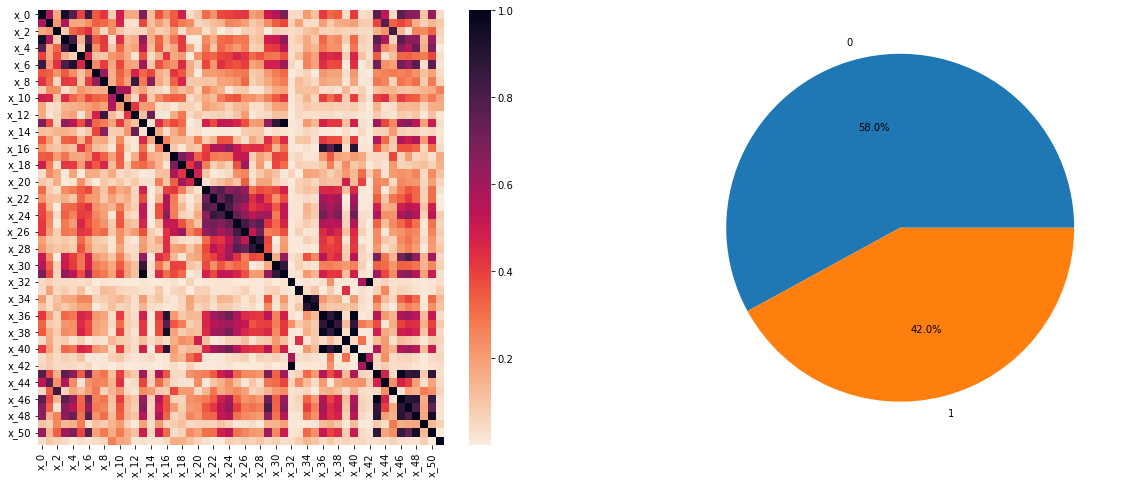

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

print(train_data.y.value_counts())

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
sns.heatmap(train_data.corr().abs(),annot=False, ax=ax[0], cmap='rocket_r')
ax[1].pie(x=train_data.y.value_counts(), labels=train_data.y.value_counts().index, autopct='%1.1f%%')

## 

# Task 3 (35 points): Implementation of Logistic Regression


In [119]:
#Helper functions

import numpy as np

#compute the sigmoid of the input X
#when X is an array, returns the array with sigmoid applied elementwise
def sigmoid(X):
    return 1/(1+np.exp(-X))

# X: Model input
def forward(X, weights, bias):
    return sigmoid(np.dot(weights.T, X) + bias)

#compute individual loss for each sample (the negitive has been factored out into the cost)
#(in this case array of individual losses for each sample)
# Y: Labels, A: Model Outputs
def loss(Y, A):
    return Y*np.log(A) + (1-Y)*np.log(1-A)

#Compute cost
# Y: Labels, A: Model Outputs
def cost(Y, A):
    return -1/len(A) * np.sum(loss(Y, A))

#partial derivitive of cost with respect to weights
def dCostWRTw(X, A, Y):
    return np.dot(X, (A-Y).T)/len(A)

#partial derivitive of cost with respect to bias
def dCostWRTb(A, Y):
    return np.sum(A-Y)/len(A)

#Predict the 
# X: Model input
def predict(X, weights, bias):
    A = forward(X, weights, bias)
    # Convert the entries of a into 0 (if activation <= 0.5) or
    # 1 (if activation > 0.5) and store the predictions in a vector.
    p = np.copy(A)
    p[p <= 0.5] = 0
    p[p > 0.5] = 1
    return p 

def accuracy(predictions, labels):
    return np.count_nonzero(predictions==labels)/len(predictions)


def createMetrics():
    return {"costs":[], "train_acc":[], "test_acc":[]}

def updateMetrics(metrics, A, weights, bias):
    metrics["costs"].append(cost(y_train, A))
    trainPredictions = predict(x_train, weights, bias)
    metrics["train_acc"].append(accuracy(trainPredictions, y_train))
    testPredictions = predict(x_test, weights, bias)
    metrics["test_acc"].append(accuracy(testPredictions, y_test))


TrainAcc: 0.69, TestAcc: 0.68


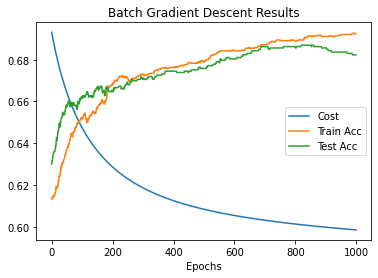

In [111]:
#Implementation of Batch Gradient Descent

x_train = train_data.to_numpy()[:, :-1].T
y_train = train_data.y.to_numpy() 
x_test = test_data.to_numpy()[:, :-1].T
y_test = test_data.y.to_numpy() 

metrics = createMetrics() #keep track of our accuracy and cost while training

#hyperparams
#I played around with these manually 
epochs = 1000
learning_rate = 0.009 

#init our weight vector based on how many features we have in the data
weights = np.zeros(x_train.shape[0])
bias = 0

#training loop
for epoch in range(epochs):
    A = forward(x_train, weights, bias)

    #compute grads of the cost func
    dw = dCostWRTw(x_train, A, y_train)
    db = dCostWRTb(A, y_train)

    #update the weights + bias with respect to our grads scaled by our learning rate hyperparm
    weights = weights - learning_rate * dw
    bias = bias - learning_rate * db

    #Update metrics for this epoch for visualization 
    updateMetrics(metrics, A, weights, bias)

print(f"TrainAcc: {metrics['train_acc'][-1]:0.2f}, TestAcc: {metrics['test_acc'][-1]:0.2f}")
plt.plot(metrics["costs"], label="Cost")
plt.plot(metrics["train_acc"], label="Train Acc")
plt.plot(metrics["test_acc"], label="Test Acc")
plt.xlabel("Epochs")
plt.title("Batch Gradient Descent Results")
plt.legend()

TrainAcc: 0.69, TestAcc: 0.68


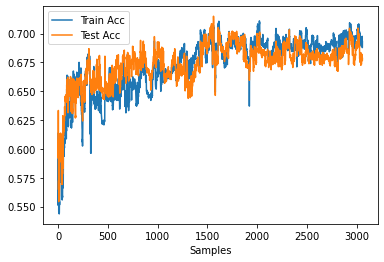

In [130]:
#Implementation of Stochastic Gradient Descent

from sklearn.utils import shuffle #better than np.random.shuffle because i can do 2 in 1

x_train = train_data.to_numpy()[:, :-1].T
y_train = train_data.y.to_numpy() 
x_test = test_data.to_numpy()[:, :-1].T
y_test = test_data.y.to_numpy() 

metrics = createMetrics() #keep track of our accuracy and cost while training

#hyperparams
#I played around with these manually 
epochs = 1
learning_rate = 0.01

#init our weight vector based on how many features we have in the data
weights = np.zeros(x_train.shape[0])
bias = 0

#training loop
for epoch in range(epochs):
    x_shuff, y_shuff = shuffle(x_train.T, y_train)
    for X, y in zip(x_shuff, y_shuff):
        A = forward(X, weights, bias)

        #reshaping magic
        A = np.array([A]) # 1 --> (1,)
        X = np.expand_dims(X, axis=1) # (51,) --> (51, 1)

        #compute grads of the cost func
        dw = dCostWRTw(X, A, y)
        db = dCostWRTb(A, y)

        #update the weights + bias with respect to our grads scaled by our learning rate hyperparm
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db

        updateMetrics(metrics, A, weights, bias)
    

print(f"TrainAcc: {metrics['train_acc'][-1]:0.2f}, TestAcc: {metrics['test_acc'][-1]:0.2f}")
plt.plot(metrics["train_acc"], label="Train Acc")
plt.plot(metrics["test_acc"], label="Test Acc")
plt.xlabel("Samples")
plt.title("Stochastic Gradient Descent Results")
plt.legend()

I also double check my implementations against a scikit-learn logistic regression model just to make sure I'm not way off.

In [121]:
#This is NOT my submission for task 3, the above cell is
#This is just to double check my implementation's results against a working implementation

x_train = train_data.to_numpy()[:, :-1].T
y_train = train_data.y.to_numpy() 
x_test = test_data.to_numpy()[:, :-1].T
y_test = test_data.y.to_numpy() 

from sklearn.linear_model import LogisticRegression
m = LogisticRegression(penalty="none", solver="sag")
m.fit(x_train.T, y_train)
trainacc = m.score(x_train.T, y_train)
testacc = m.score(x_test.T, y_test)
print(f"TrainAcc: {trainacc:0.2f}, TestAcc: {testacc:0.2f}")

TrainAcc: 0.72, TestAcc: 0.71


/home/james/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
